In [1]:
# installing the kaggle library
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# importing the dataset from kaggle

!kaggle competitions download -c dogs-vs-cats

 98% 797M/812M [00:05<00:00, 178MB/s]
100% 812M/812M [00:05<00:00, 145MB/s]


In [4]:
!ls


dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
#extracting the compressed dataset
from zipfile import ZipFile

dataset='/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [6]:
#extracting the compressed test file dataset
from zipfile import ZipFile

dataset='/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the test file dataset is extracted')

the test file dataset is extracted


In [7]:
import os
#counting the number of lines in train folder
path,dirs,files= next(os.walk('/content/train'))

file_count=len(files)
print('Number of images: ' ,file_count)

Number of images:  25000


In [8]:
# Printing the name of images
file_names=os.listdir('/content/train')
print(file_names)

['dog.8902.jpg', 'cat.6242.jpg', 'dog.11083.jpg', 'dog.2571.jpg', 'cat.10688.jpg', 'dog.12021.jpg', 'cat.86.jpg', 'cat.9925.jpg', 'cat.2745.jpg', 'dog.25.jpg', 'dog.7204.jpg', 'dog.5778.jpg', 'cat.4286.jpg', 'cat.4210.jpg', 'dog.6543.jpg', 'dog.5902.jpg', 'cat.8248.jpg', 'cat.11920.jpg', 'dog.5856.jpg', 'cat.2282.jpg', 'cat.12428.jpg', 'cat.1932.jpg', 'dog.12093.jpg', 'cat.4339.jpg', 'cat.4556.jpg', 'cat.1891.jpg', 'dog.3509.jpg', 'cat.2210.jpg', 'dog.10525.jpg', 'dog.1048.jpg', 'dog.10854.jpg', 'dog.2798.jpg', 'cat.1282.jpg', 'cat.9720.jpg', 'cat.1823.jpg', 'cat.7263.jpg', 'dog.7866.jpg', 'cat.7534.jpg', 'dog.1756.jpg', 'cat.2588.jpg', 'dog.11945.jpg', 'cat.7395.jpg', 'dog.8140.jpg', 'cat.2949.jpg', 'cat.10405.jpg', 'dog.10860.jpg', 'dog.11379.jpg', 'dog.12402.jpg', 'dog.229.jpg', 'dog.2059.jpg', 'cat.480.jpg', 'cat.398.jpg', 'cat.1543.jpg', 'dog.1790.jpg', 'dog.7678.jpg', 'cat.10008.jpg', 'dog.6899.jpg', 'cat.6128.jpg', 'cat.8658.jpg', 'dog.11104.jpg', 'dog.7097.jpg', 'dog.4437.jpg',

In [10]:
 # importing the dependencies
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

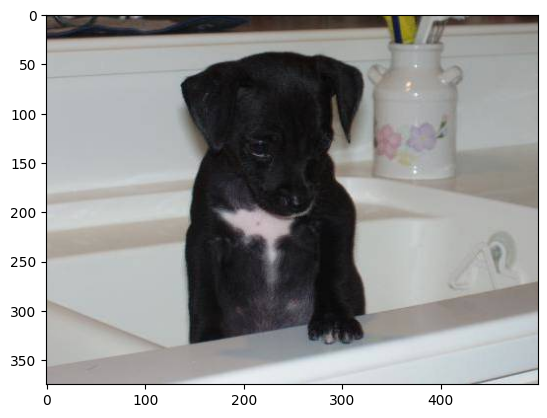

In [17]:
# display dog image
img=mpimg.imread('/content/train/dog.8298.jpg')
imgplt=plt.imshow(img)
plt.show()

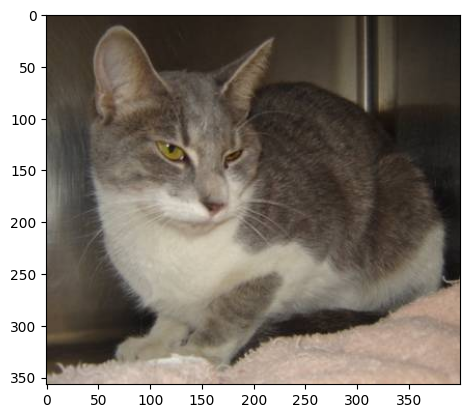

In [19]:
# displaying cat image
# display dog image
img=mpimg.imread('/content/train/cat.4352.jpg')
imgplt=plt.imshow(img)
plt.show()



In [23]:
file_names=os.listdir('/content/train/')

for i in range(5):

  name=file_names[i]
  print(name[0:3])

dog
cat
dog
dog
cat


In [29]:

file_names=os.listdir('/content/train/')

dog_count=0
cat_count=0
for img_file in file_names:
    name= img_file[0:3]

    if name=='dog':
     dog_count += 1

    else:
      cat_count += 1
print('Number fo dog image= ',dog_count)
print('Number fo dog image= ',cat_count)

Number fo dog image=  12500
Number fo dog image=  12500


In [48]:
# creating a dir for resized images
os.mkdir('/content/image_resized')

In [49]:
original_folder='/content/train/'
resized_folder='/content/image_resized/'

for i in range(2000):

   filename=os.listdir(original_folder)[i]
   img_path=original_folder+filename
   img=Image.open(img_path)
   img=img.resize((224,224))
   img =img.convert('RGB')

   newImgPath=resized_folder+filename
   img.save(newImgPath)

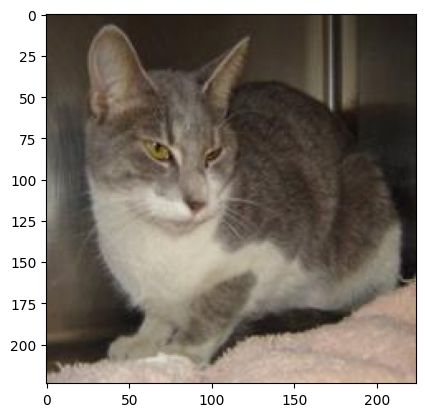

In [54]:
# display dog image to check if the size has changed after the change above
# display resized cat image
img = mpimg.imread('/content/image resized/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [56]:
#Creating labels for resized images of dogs and cats
# Cats->0
# Dogs-> 1

# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [57]:
print(filenames[0:5])
print(len(filenames))

['dog.8902.jpg', 'cat.6242.jpg', 'dog.11083.jpg', 'dog.2571.jpg', 'cat.10688.jpg']
2000


In [58]:
print(labels[0:5])
print(len(labels))

[1, 0, 1, 1, 0]
2000


In [59]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 993 1007]


In [60]:
#Converting all the resized images to numpy arrays
import cv2
import glob

In [61]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [62]:
type(dog_cat_images)

numpy.ndarray

In [63]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [64]:
X = dog_cat_images
Y = np.asarray(labels)

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [66]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [67]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [68]:
print(X_train_scaled)

[[[[0.40392157 0.45882353 0.50588235]
   [0.41960784 0.4745098  0.52156863]
   [0.41960784 0.4745098  0.52156863]
   ...
   [0.14509804 0.20784314 0.37254902]
   [0.09803922 0.16470588 0.31764706]
   [0.14901961 0.21568627 0.36862745]]

  [[0.42745098 0.48235294 0.52941176]
   [0.42745098 0.48235294 0.52941176]
   [0.41176471 0.46666667 0.51372549]
   ...
   [0.14509804 0.20784314 0.37254902]
   [0.09803922 0.16470588 0.31764706]
   [0.14901961 0.21568627 0.36862745]]

  [[0.43921569 0.49019608 0.54509804]
   [0.42352941 0.4745098  0.52941176]
   [0.39607843 0.45098039 0.49803922]
   ...
   [0.14509804 0.20784314 0.37254902]
   [0.10196078 0.16862745 0.32156863]
   [0.15294118 0.21960784 0.37254902]]

  ...

  [[0.39215686 0.45490196 0.50588235]
   [0.47058824 0.53333333 0.58431373]
   [0.43137255 0.49411765 0.54117647]
   ...
   [0.54117647 0.61568627 0.64313725]
   [0.51764706 0.58823529 0.63137255]
   [0.44705882 0.51372549 0.56470588]]

  [[0.28627451 0.34509804 0.40784314]
   [0.4

In [69]:
#Building the Neural Network
import tensorflow as tf
import tensorflow_hub as hub

In [70]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [71]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [72]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [73]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 64s 1s/step - loss: 0.2188 - acc: 0.9125
Epoch 2/5
50/50 [==============================] - 60s 1s/step - loss: 0.0663 - acc: 0.9794
Epoch 3/5
50/50 [==============================] - 65s 1s/step - loss: 0.0494 - acc: 0.9856
Epoch 4/5
50/50 [==============================] - 59s 1s/step - loss: 0.0377 - acc: 0.9912
Epoch 5/5
50/50 [==============================] - 57s 1s/step - loss: 0.0307 - acc: 0.9937


In [74]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 17s 1s/step - loss: 0.0532 - acc: 0.9800
Test Loss = 0.05320519581437111
Test Accuracy = 0.9800000190734863


Path of the image to be predicted: /content/download.jpg


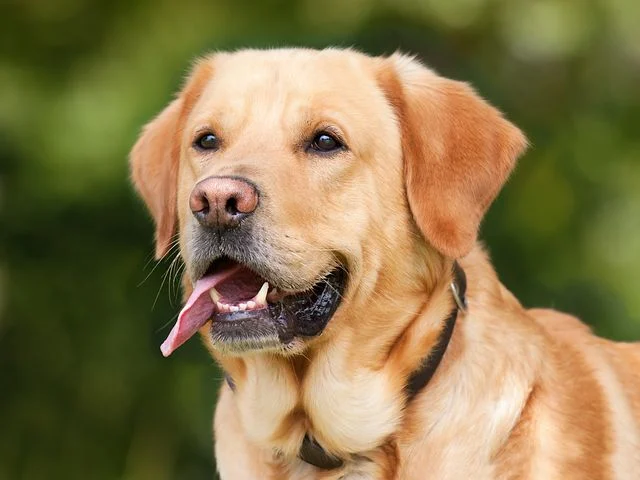

1/1 [==============================] - 1s 764ms/step
[[-4.983464  5.653714]]
1
The image represents a Dog


In [79]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpg


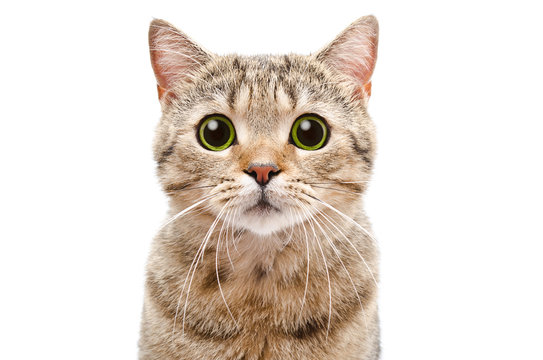

1/1 [==============================] - 0s 77ms/step
[[ 3.5263643 -2.212461 ]]
0
The image represents a Cat


In [80]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')